In [22]:
!pip install dash plotly pandas

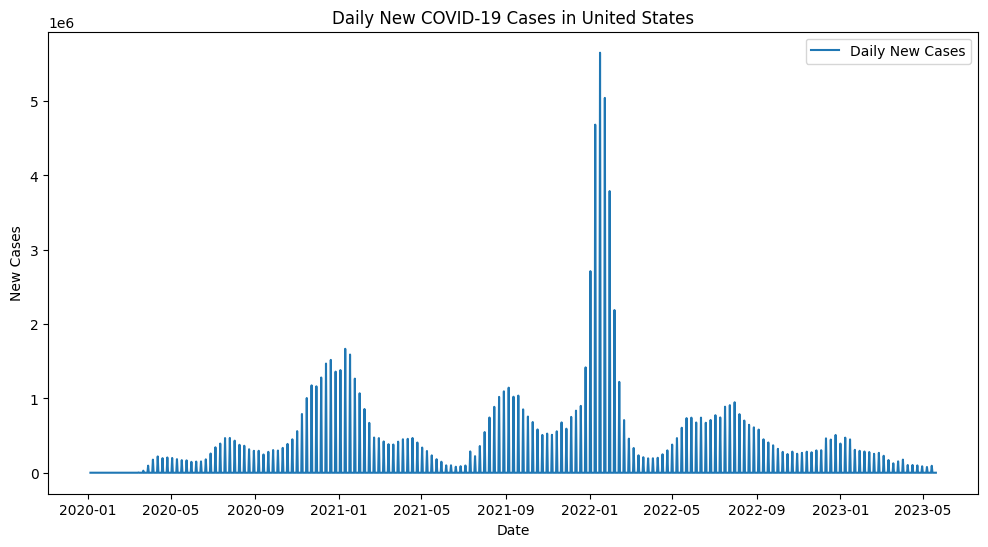

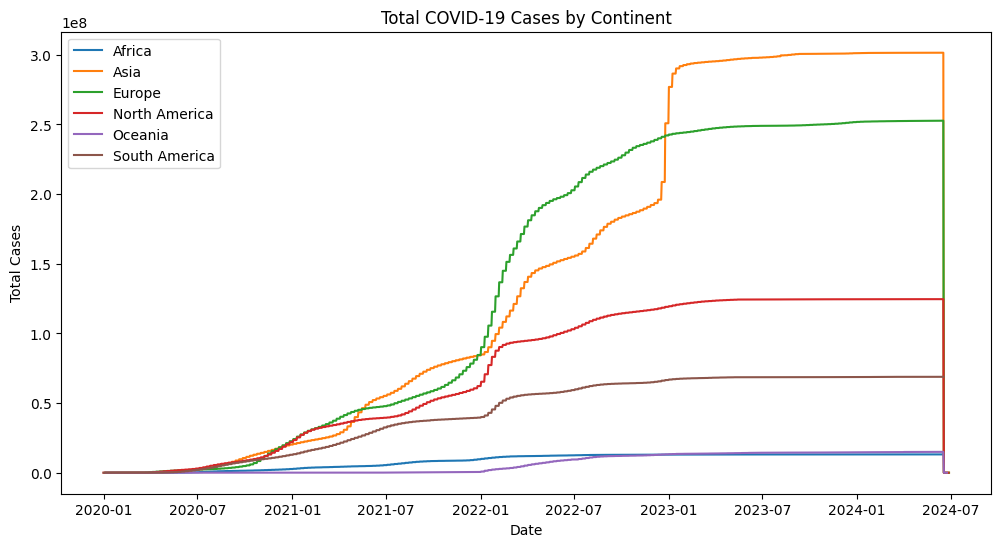

<IPython.core.display.Javascript object>

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from dash import Dash, dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go

# Load the COVID-19 dataset
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Data Cleaning
df['date'] = pd.to_datetime(df['date'])
df = df[df['continent'].notna()]  # Remove rows where continent is NaN

# Static Visualizations
def plot_daily_new_cases(country):
    df_country = df[df['location'] == country]
    plt.figure(figsize=(12, 6))
    plt.plot(df_country['date'], df_country['new_cases'], label='Daily New Cases')
    plt.title(f'Daily New COVID-19 Cases in {country}')
    plt.xlabel('Date')
    plt.ylabel('New Cases')
    plt.legend()
    plt.show()

def plot_total_cases_by_continent():
    df_continent = df.groupby(['continent', 'date'])['total_cases'].sum().reset_index()
    plt.figure(figsize=(12, 6))
    for continent in df_continent['continent'].unique():
        df_temp = df_continent[df_continent['continent'] == continent]
        plt.plot(df_temp['date'], df_temp['total_cases'], label=continent)
    plt.title('Total COVID-19 Cases by Continent')
    plt.xlabel('Date')
    plt.ylabel('Total Cases')
    plt.legend()
    plt.show()

# Plot examples
plot_daily_new_cases('United States')
plot_total_cases_by_continent()

# Dash App for Interactive Visualization
app = Dash(__name__)

app.layout = html.Div([
    dcc.Dropdown(
        id='country-dropdown',
        options=[{'label': c, 'value': c} for c in df['location'].unique()],
        value='United States'
    ),
    dcc.Graph(id='country-graph')
])

@app.callback(
    Output('country-graph', 'figure'),
    [Input('country-dropdown', 'value')]
)
def update_graph(selected_country):
    df_country = df[df['location'] == selected_country]
    fig = px.line(df_country, x='date', y='new_cases', title=f'Daily New COVID-19 Cases in {selected_country}')
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)
